In [19]:
from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [20]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [21]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [22]:
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32')/255

test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32')/255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [23]:
mlp = Sequential()
mlp.add(Dense(512, activation='relu', input_shape=(28*28,)))
mlp.add(Dense(10, activation='softmax'))

In [24]:
mlp.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [25]:
mlp.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 4s 8ms/step - loss: 0.2591 - accuracy: 0.9245
Epoch 2/5
469/469 [==============================] - 4s 8ms/step - loss: 0.1040 - accuracy: 0.9693
Epoch 3/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0687 - accuracy: 0.9797
Epoch 4/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0499 - accuracy: 0.9849
Epoch 5/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0378 - accuracy: 0.9889


In [26]:
test_loss, test_acc = mlp.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.0712 - accuracy: 0.9784


In [27]:
mlp.save("../neural_networks/mlp_model")

INFO:tensorflow:Assets written to: ../neural_networks/mlp_model\assets


In [28]:
reconstructed_mlp = load_model("../neural_networks/mlp_model")

In [29]:
new_digit = np.array(
[[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0,0,195,255,240,255,225,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,255,255,255,255,255,255,255,225,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,255,255,255,255,255,255,255,255,255,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,255,255,255,255,255,0,0,255,255,255,195,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,255,255,255,255,0,0,0,0,0,255,255,225,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,255,255,255,0,0,0,0,0,0,255,255,255,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,255,255,255,0,0,0,0,0,0,210,255,255,195,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,255,255,255,0,0,0,0,0,0,0,255,255,210,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,180,255,255,255,195,0,0,0,0,0,255,255,255,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,195,255,255,255,255,0,0,0,255,255,255,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,180,255,255,255,255,210,255,255,255,195,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0,255,255,255,255,255,255,225,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,240,255,255,255,255,255,255,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,255,255,255,240,195,255,255,255,195,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,255,255,255,195,0,0,0,255,255,255,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,180,255,255,240,0,0,0,0,225,255,255,195,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,225,255,255,0,0,0,0,0,0,255,255,255,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,210,255,210,0,0,0,0,0,0,255,255,255,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,255,255,255,0,0,0,0,0,180,255,255,240,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,240,255,255,195,0,180,195,225,255,255,255,180,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,255,255,255,255,240,255,255,255,255,180,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,255,255,255,255,225,210,210,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,180,210,195,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]]
)


In [30]:
new_digit = new_digit.reshape((1, 28*28))
new_digit = new_digit.astype('float32')/255

In [31]:
result = reconstructed_mlp.predict(new_digit)

1/1 [==============================] - 0s 50ms/step


In [32]:
result

array([[2.5749347e-10, 2.6258583e-08, 9.8061271e-04, 8.0911532e-06,
        2.9522088e-15, 4.6858446e-07, 2.3963432e-06, 5.4763578e-13,
        9.9900848e-01, 1.8453782e-11]], dtype=float32)

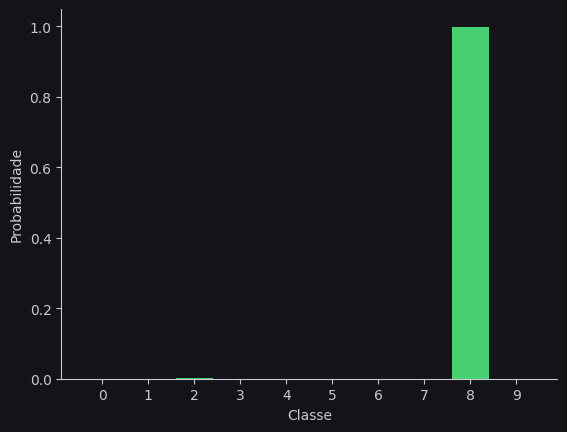

In [33]:
plt.rcParams['axes.facecolor'] = '#131417'
plt.rcParams['figure.facecolor'] = '#131417'
plt.bar(np.arange(10), result[0], color="#47CF73")
plt.xticks(np.arange(10))
plt.ylabel("Probabilidade")
plt.xlabel("Classe")

ax = plt.gca()
ax.xaxis.label.set_color('#C7C9D3')        #setting up X-axis label color to yellow
ax.yaxis.label.set_color('#C7C9D3')          #setting up Y-axis label color to blue

ax.tick_params(axis='x', colors='#C7C9D3')    #setting up X-axis tick color to red
ax.tick_params(axis='y', colors='#C7C9D3')  #setting up Y-axis tick color to black

ax.spines['bottom'].set_color('#C7C9D3')        # setting up Y-axis tick color to red
ax.spines['left'].set_color('#C7C9D3')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig('chart_probs_mlp.png', dpi=300)

In [34]:
result[0].argmax()

8